### 데이터 분석
diff_percentage = (upbit_price / binance_price -1) *100

In [2]:
import pandas as pd
df_krw = pd.read_csv('DATA/btc_diff_percentage_2023.csv').drop(columns='Unnamed: 0')
df_krw['Open time']=pd.to_datetime(df_krw['Open time'])

In [6]:
# 결측치 확인 (바이낸스 점검으로 결측값이 존재)
df_krw.isna().sum()

Open time           0
Upbit               0
Binance            16
diff               16
diff_percentage    16
dtype: int64

In [8]:
df_krw = df_krw.dropna(subset=['Binance'], ignore_index=True) # 2023년 거래 일시중지로 인한 결측값 제거

In [9]:
df_krw.describe()

,Open time,Upbit,Binance,diff,diff_percentage
count,105104,1.051040e+05,1.051040e+05,1.051040e+05,105104.000000
mean,2023-07-02 12:17:31.755404032,3.834329e+07,3.766799e+07,6.753042e+05,1.673043
min,2023-01-01 00:00:00,2.101000e+07,2.092221e+07,-1.779489e+06,-3.866144
25%,2023-04-02 06:58:45,3.503700e+07,3.422620e+07,2.549964e+05,0.732531
50%,2023-07-02 12:37:30,3.712200e+07,3.669494e+07,5.412912e+05,1.523371
75%,2023-10-01 18:16:15,3.999900e+07,3.960743e+07,8.626239e+05,2.477708
max,2023-12-31 23:55:00,6.125600e+07,5.902416e+07,3.916793e+06,10.207584
std,NaN,8.322450e+06,7.882586e+06,6.671152e+05,1.317540


### 데이터 시각화

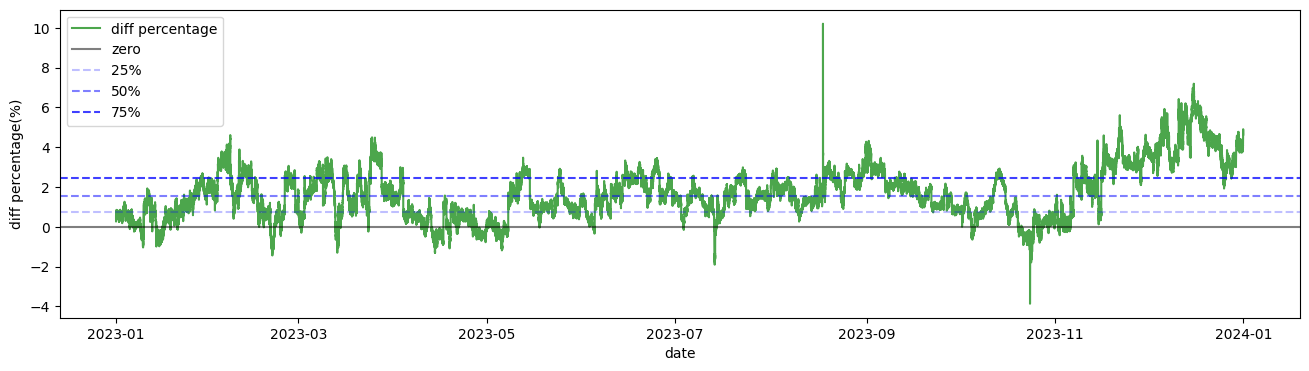

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.plot(df_krw['Open time'], df_krw['diff_percentage'], color='green', alpha =0.7, label = 'diff percentage' )
plt.axhline(y=0, color='black', linewidth=1.5, alpha =0.5, label= 'zero')  # 빨간색 점선, 두께 1.5
plt.axhline(y=df_krw['diff_percentage'].quantile(.25), color='b', linestyle='--', linewidth=1.5, alpha =0.25, label='25%')  # 빨간색 점선, 두께 1.5
plt.axhline(y=df_krw['diff_percentage'].quantile(.50), color='b', linestyle='--', linewidth=1.5, alpha =0.5, label='50%')  # 빨간색 점선, 두께 1.5
plt.axhline(y=df_krw['diff_percentage'].quantile(.75), color='b', linestyle='--', linewidth=1.5, alpha =0.75, label='75%')  # 빨간색 점선, 두께 1.5

plt.legend()
plt.ylabel("diff percentage(%)")
plt.xlabel("date")
plt.show()

In [16]:
len(df_krw.loc[df_krw['diff_percentage']>=0])/len(df_krw)

0.9194987821586238

상당 기간 업비트의 시세가 바이낸스의 시세보다 높다고 할 수 있으며 그 기간의 비율은 약 0.9195입니다. 

이 시세 차이를 이용해 업비트와 바이낸스 가격 차이를 이용한 매매를 해봅시다.

업비트에서 비트코인 시세가 바이낸스에서보다 높다면 바이낸스에서 비트코인을 사서 업비트로 옮긴 다음 매도할 수 있습니다.

반대로 바이낸스에서 시세가 업비트에서보다 높다면 업비트에서 비트코인을 사서 바이낸스로 옮긴 다음 매도할 수 있습니다.

예를 들어 김프가 +5%고 바이낸스의 가격이 1억원이면 diff_percentage = (upbit_price / binance_price -1) *100 식에 따라 0.05 = upbit_price/1억원 -1 

upbit_price = 1.05억원 입니다.




In [17]:
1/1.05

0.9523809523809523

### 업비트와 바이낸스 BTC 가격 차이 통계 검정
업비트의 가격이 바이낸스보다 높다는 가설을 통계검정을 해보았습니다.

In [ ]:
import scipy.stats as stats

# 정규성 검정
